In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist


In [20]:
# Loading MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Splitting the training data into 80% training and 20% validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)


print(f"Training set shape: {x_train.shape}, Labels shape: {y_train.shape}")
print(f"Validation set shape: {x_val.shape}, Labels shape: {y_val.shape}")
print(f"Test set shape: {x_test.shape}, Labels shape: {y_test.shape}")


Training set shape: (48000, 28, 28), Labels shape: (48000,)
Validation set shape: (12000, 28, 28), Labels shape: (12000,)
Test set shape: (10000, 28, 28), Labels shape: (10000,)


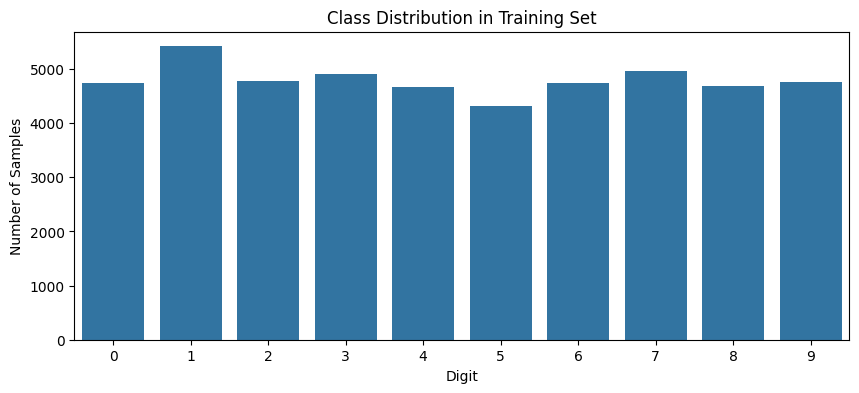

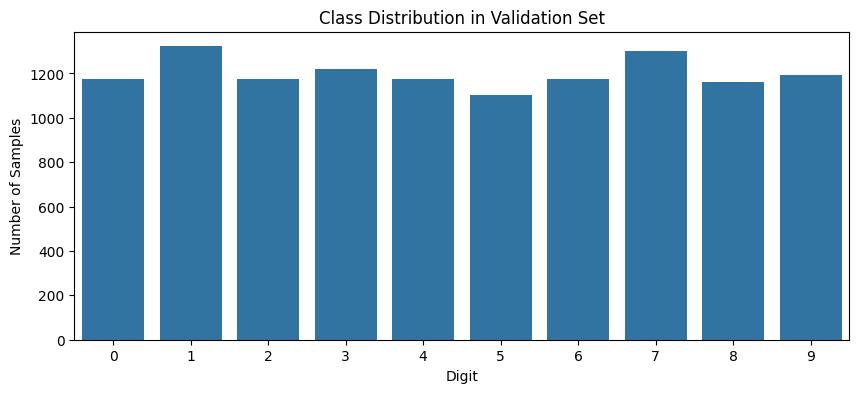

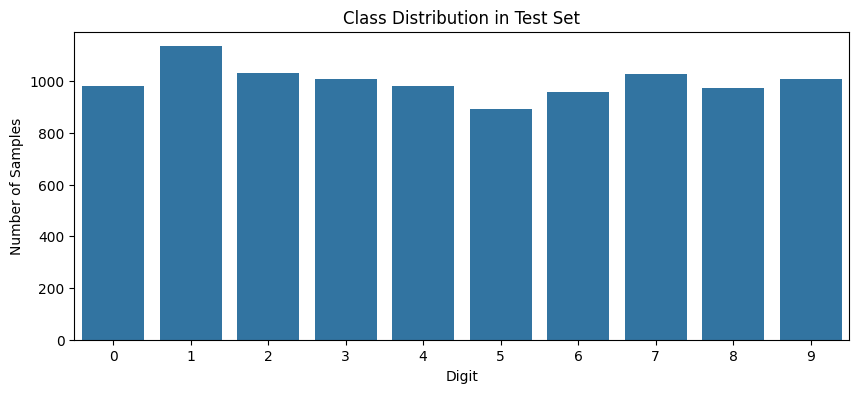

Training Set - Mean: 33.34, Standard Deviation: 78.59
Validation Set - Mean: 33.23, Standard Deviation: 78.46
Test Set - Mean: 33.79, Standard Deviation: 79.17


In [21]:
def plot_class_distribution(y, title):
    counts = Counter(y)
    plt.figure(figsize=(10, 4))
    sns.barplot(x=list(counts.keys()), y=list(counts.values()))
    plt.xlabel("Digit")
    plt.ylabel("Number of Samples")
    plt.title(title)
    plt.show()


plot_class_distribution(y_train, "Class Distribution in Training Set")
plot_class_distribution(y_val, "Class Distribution in Validation Set")
plot_class_distribution(y_test, "Class Distribution in Test Set")


def compute_statistics(x, dataset_name):
    mean, std = np.mean(x), np.std(x)
    print(f"{dataset_name} - Mean: {mean:.2f}, Standard Deviation: {std:.2f}")


compute_statistics(x_train, "Training Set")
compute_statistics(x_val, "Validation Set")
compute_statistics(x_test, "Test Set")



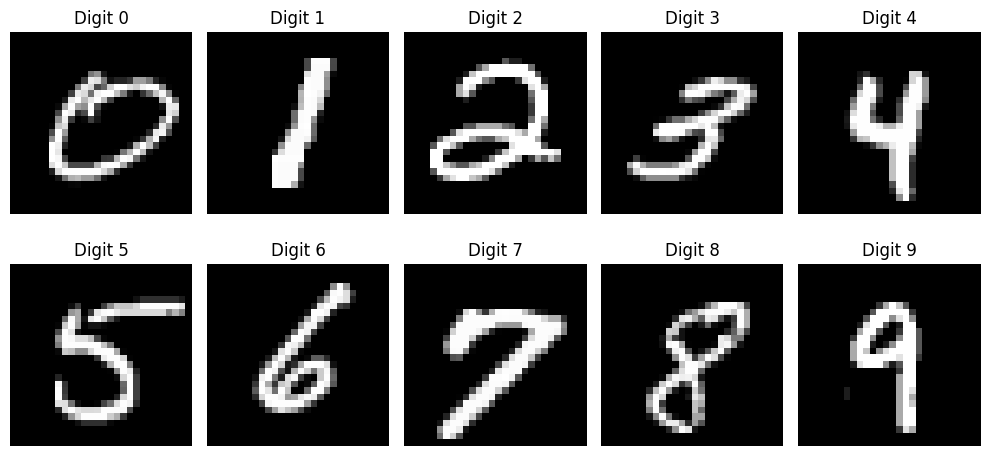

In [22]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
axes = axes.ravel()

for i in range(10):
    sample_idx = np.where(y_train == i)[0][0]
    axes[i].imshow(x_train[sample_idx], cmap='gray')
    axes[i].set_title(f"Digit {i}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()



In [23]:
x_train = x_train.astype("float32") / 255.0
x_val = x_val.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0


x_train = x_train.reshape(x_train.shape[0], -1)
x_val = x_val.reshape(x_val.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)


compute_statistics(x_train, "Training Set")
compute_statistics(x_val, "Validation Set")
compute_statistics(x_test, "Test Set")



Training Set - Mean: 0.13, Standard Deviation: 0.31
Validation Set - Mean: 0.13, Standard Deviation: 0.31
Test Set - Mean: 0.13, Standard Deviation: 0.31


In [24]:
k_values = [1, 3, 5, 7, 9]
val_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_val_pred = knn.predict(x_val)
    acc = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(acc)
    print(f"k = {k}, Validation Accuracy: {acc:.4f}")



k = 1, Validation Accuracy: 0.9741
k = 3, Validation Accuracy: 0.9727
k = 5, Validation Accuracy: 0.9715
k = 7, Validation Accuracy: 0.9696
k = 9, Validation Accuracy: 0.9673


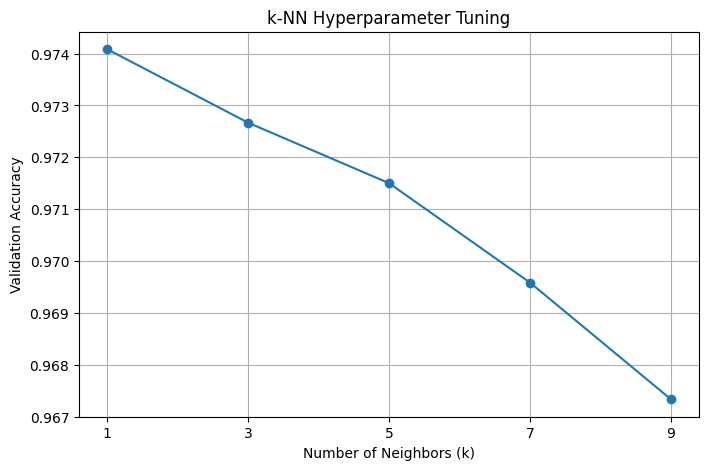

In [25]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, val_accuracies, marker='o', linestyle='-')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Validation Accuracy")
plt.title("k-NN Hyperparameter Tuning")
plt.xticks(k_values)
plt.grid(True)
plt.show()


In [26]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


best_k = 3 # best accuracy was when k = 1 however with k = 1 might overfit so for more stable values I choosed k = 3


x_train_final = np.vstack((x_train, x_val))
y_train_final = np.hstack((y_train, y_val))


knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(x_train_final, y_train_final)


y_test_pred = knn_final.predict(x_test)


test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")


Test Accuracy: 0.9705


In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score


precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')


print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred))


Precision: 0.9707
Recall: 0.9705
F1-Score: 0.9705

Classification Report:

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.96      1.00      0.98      1135
           2       0.98      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.96       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



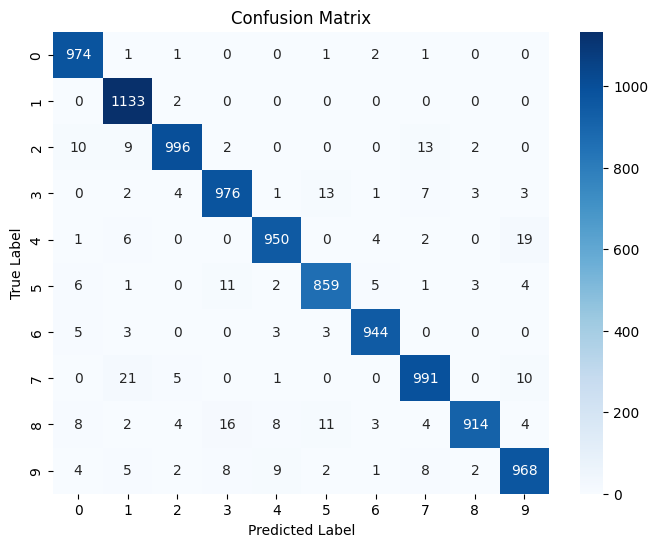

In [28]:

cm = confusion_matrix(y_test, y_test_pred)


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [29]:

misclassified_counts = np.sum(cm, axis=1) - np.diag(cm)
misclassified_digits = np.argsort(misclassified_counts)[::-1]


for i in range(3):
    print(f"Digit {misclassified_digits[i]} was misclassified {misclassified_counts[misclassified_digits[i]]} times.")


Digit 8 was misclassified 60 times.
Digit 9 was misclassified 41 times.
Digit 7 was misclassified 37 times.


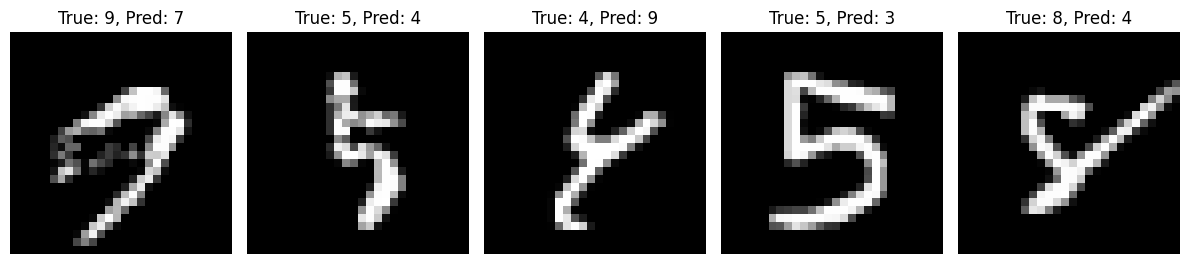

In [30]:

misclassified_indices = np.where(y_test != y_test_pred)[0]


np.random.seed(42)
random_misclassified = np.random.choice(misclassified_indices, 5, replace=False)


fig, axes = plt.subplots(1, 5, figsize=(12, 3))

for i, idx in enumerate(random_misclassified):
    axes[i].imshow(x_test[idx].reshape(28, 28), cmap="gray")
    axes[i].set_title(f"True: {y_test[idx]}, Pred: {y_test_pred[idx]}")
    axes[i].axis("off")

plt.tight_layout()
plt.show()


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score


dt = DecisionTreeClassifier(random_state=42)


dt.fit(x_train_final, y_train_final)


y_test_pred_dt = dt.predict(x_test)


test_accuracy_dt = accuracy_score(y_test, y_test_pred_dt)
print(f"Test Accuracy for Decision Tree: {test_accuracy_dt:.4f}")


Test Accuracy for Decision Tree: 0.8754


In [35]:
max_depth_values = [2, 5, 10]
min_samples_split_values = [2, 5]


results = []


for max_depth in max_depth_values:
    for min_samples_split in min_samples_split_values:
        print(f"\nTraining Decision Tree with max_depth={max_depth} and min_samples_split={min_samples_split}...")


        dt_tuned = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, random_state=42)


        dt_tuned.fit(x_train_final, y_train_final)


        y_test_pred_tuned = dt_tuned.predict(x_test)


        accuracy = accuracy_score(y_test, y_test_pred_tuned)


        results.append((max_depth, min_samples_split, accuracy))
        print(f"Test Accuracy: {accuracy:.4f}")


print("\nHyperparameter tuning results:")
for res in results:
    print(f"max_depth={res[0]}, min_samples_split={res[1]} -> Accuracy: {res[2]:.4f}")




Training Decision Tree with max_depth=2 and min_samples_split=2...
Test Accuracy: 0.3447

Training Decision Tree with max_depth=2 and min_samples_split=5...
Test Accuracy: 0.3447

Training Decision Tree with max_depth=5 and min_samples_split=2...
Test Accuracy: 0.6747

Training Decision Tree with max_depth=5 and min_samples_split=5...
Test Accuracy: 0.6747

Training Decision Tree with max_depth=10 and min_samples_split=2...
Test Accuracy: 0.8663

Training Decision Tree with max_depth=10 and min_samples_split=5...
Test Accuracy: 0.8658

Hyperparameter tuning results:
max_depth=2, min_samples_split=2 -> Accuracy: 0.3447
max_depth=2, min_samples_split=5 -> Accuracy: 0.3447
max_depth=5, min_samples_split=2 -> Accuracy: 0.6747
max_depth=5, min_samples_split=5 -> Accuracy: 0.6747
max_depth=10, min_samples_split=2 -> Accuracy: 0.8663
max_depth=10, min_samples_split=5 -> Accuracy: 0.8658


In [36]:
best_config = max(results, key=lambda x: x[2])


print(f"\nBest configuration - max_depth={best_config[0]}, min_samples_split={best_config[1]}")
print(f"Best Test Accuracy: {best_config[2]:.4f}")




Best configuration - max_depth=10, min_samples_split=2
Best Test Accuracy: 0.8663


In [37]:
best_max_depth = 10
best_min_samples_split = 2


final_dt = DecisionTreeClassifier(max_depth=best_max_depth, min_samples_split=best_min_samples_split, random_state=42)
final_dt.fit(x_train_final, y_train_final)


y_test_pred_final = final_dt.predict(x_test)


print("Final Model Evaluation:")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred_final):.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_final))



Final Model Evaluation:
Test Accuracy: 0.8663

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       980
           1       0.95      0.96      0.95      1135
           2       0.85      0.84      0.84      1032
           3       0.82      0.84      0.83      1010
           4       0.86      0.85      0.86       982
           5       0.84      0.80      0.82       892
           6       0.91      0.87      0.89       958
           7       0.90      0.88      0.89      1028
           8       0.80      0.81      0.80       974
           9       0.81      0.86      0.83      1009

    accuracy                           0.87     10000
   macro avg       0.87      0.86      0.86     10000
weighted avg       0.87      0.87      0.87     10000



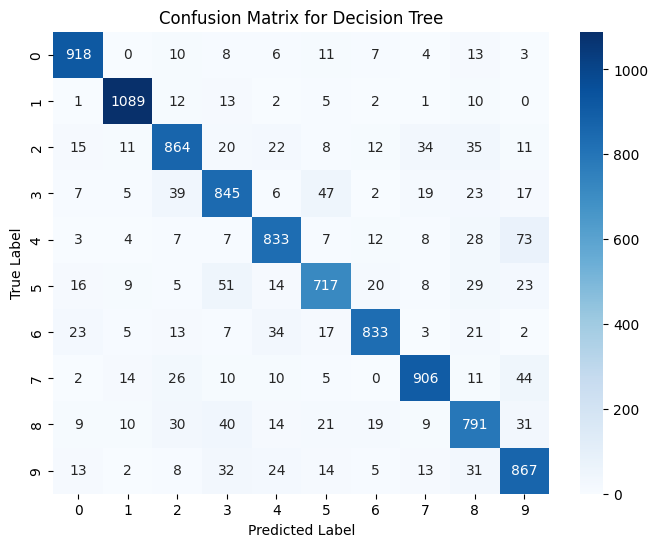


Most Misclassified Digits:
Digit 8 was misclassified 183 times.
Digit 5 was misclassified 175 times.
Digit 2 was misclassified 168 times.


In [38]:
cm_final = confusion_matrix(y_test, y_test_pred_final)


plt.figure(figsize=(8, 6))
sns.heatmap(cm_final, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Decision Tree")
plt.show()


misclassified_counts = np.sum(cm_final, axis=1) - np.diag(cm_final)
misclassified_digits = np.argsort(misclassified_counts)[::-1]


print("\nMost Misclassified Digits:")
for i in range(3):
    print(f"Digit {misclassified_digits[i]} was misclassified {misclassified_counts[misclassified_digits[i]]} times.")



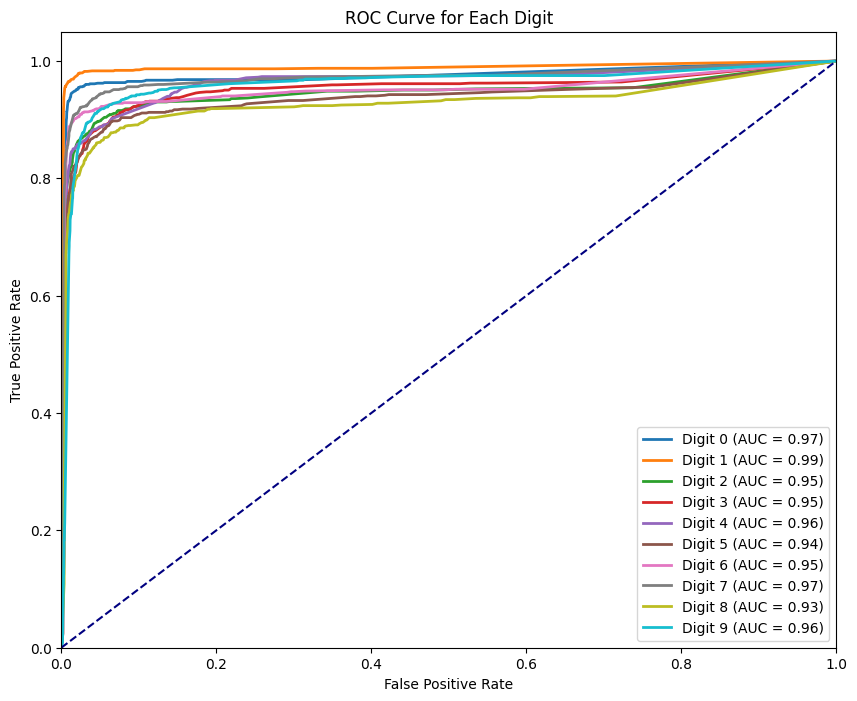

In [39]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


y_test_bin = label_binarize(y_test, classes=range(10))


plt.figure(figsize=(10, 8))


for i in range(10):

    y_score = final_dt.predict_proba(x_test)[:, i]


    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score)
    roc_auc = auc(fpr, tpr)


    plt.plot(fpr, tpr, lw=2, label=f'Digit {i} (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Each Digit")
plt.legend(loc="lower right")
plt.show()
